<a href="https://colab.research.google.com/github/davidakinsade/davidakinsade.github.io/blob/main/LungTFModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
!unzip lungdataset.zip

unzip:  cannot find or open lungdataset.zip, lungdataset.zip.zip or lungdataset.zip.ZIP.


In [ ]:
#importing files
img_height, img_width = 512, 512
batch_size = 30

train_ds = tf.keras.utils.image_dataset_from_directory(
    "lungdataset/training", 
    image_size = (img_height, img_width),
    batch_size = batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "lungdataset/validation", 
    image_size = (img_height, img_width), 
    batch_size = batch_size
) 

test_ds = tf.keras.utils.image_dataset_from_directory(
    "lungdataset/test", 
    image_size = (img_height, img_width),
    batch_size = batch_size
)


Found 2365 files belonging to 5 classes.
Found 36 files belonging to 5 classes.
Found 276 files belonging to 5 classes.


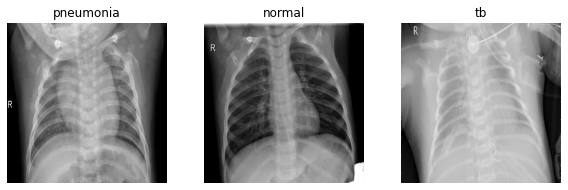

In [ ]:
#stating the class names
# class_names = ["covid", "normal", "pneumonia", "tb"]
# plt.figure(figsize=(10,10))
# for images, labels in train_ds.take(1):
#   for i in range(3):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

class_names = ["covid", "normal", "pneumonia", "tb"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    
    


In [ ]:
#CNNs - Deep learning network arcitecture for Image recognition
model = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(3)
    ]
)

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 7
)

Epoch 1/7


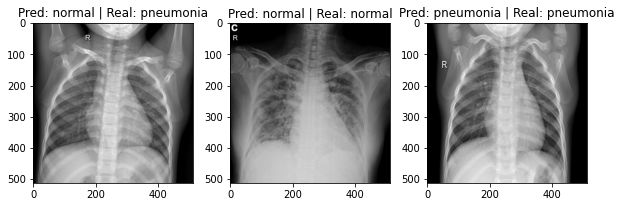

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  #print(classifications)

  for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)